In [1]:
import glob
import numpy as np
import pickle
import sys

[sys.path.append(f) for f in glob.glob('../utils/*')]
from plotting_utils import figSize

import matplotlib.pyplot as plt 


sessions_dir  = '/oak/stanford/groups/shenoy/ghwilson/sessions/t5/'



sessions_dict = dict()
sessions_dict['t5.2022.05.18'] = [0]
sessions_dict['t5.2022.05.23'] = [7, 8]


In [2]:
import json
import numpy as np
import glob
import pandas as pd
import pickle 



def fromRedis(serialized_arr: str) -> np.array:
    sep = '|'.encode('utf-8')
    i_0 = serialized_arr.find(sep)
    i_1 = serialized_arr.find(sep, i_0 + 1)
    arr_dtype = serialized_arr[:i_0].decode('utf-8')
    arr_shape = tuple([int(a) for a in serialized_arr[i_0 + 1:i_1].decode('utf-8').split(',')])
    arr_str = serialized_arr[i_1 + 1:]
    arr = np.frombuffer(arr_str, dtype = arr_dtype).reshape(arr_shape)
    return arr



def redis_to_dict(r):
    d = dict()
    for key, value in r.items():
        d_key    = key.decode('utf-8')
        
        try:
            d[d_key] = fromRedis(bytearray(value))
        except:
            d[d_key] = value
    
    return d



def loadPickleData(pkl_files):
    
    df_list = list()
    for file in pkl_files:
        with open(file, 'rb') as f:
            dat = pickle.load(f)['taskOutput_stream']
            
            dicts    = [redis_to_dict(x[1]) for x in dat]
            df_list.append(pd.DataFrame(dicts))
    
    return df_list
    

In [84]:
OL_files

[['/oak/stanford/groups/shenoy/ghwilson/sessions/t5/t5.2022.05.18/Data/TaskData/FittsTask/2022-05-18_block_0.pkl']]

{'neural_means': 219.484375}
{'neural_means': 242.47395833333334}


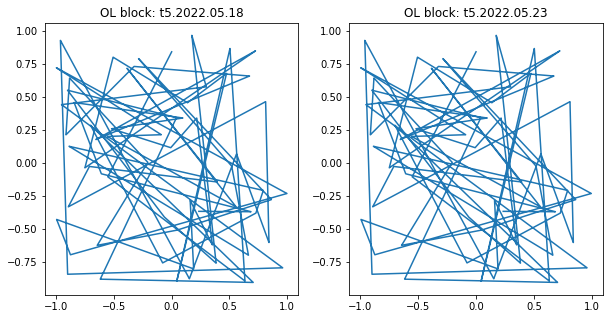

In [85]:
figSize(5, 10)

sessions_data = list()

OL_means = list()
for i, (session, val) in enumerate(sessions_dict.items()):
    session_path = sessions_dir + session + '/Data/TaskData/FittsTask/'
    
    
    rest_file = glob.glob(session_path + '*rest_means*')[0]
    OL_files  = [glob.glob(session_path + f'*block_{block}*')[0] for block in val]
    
    with open(rest_file, 'rb') as f:
        rest_means = pickle.load(f)
        print(rest_means)
        
    OL_data  = loadPickleData(OL_files)[0]
    
    OL_means.append(np.vstack(OL_data['neural']).mean(axis = 0))
    
    plt.subplot(1, 2, i+1)
    plt.plot(cursor_pos[:5000, 0], cursor_pos[:5000, 1])
    plt.title('OL block: ' + session)
    
plt.show()
    

In [ ]:
'/oak/stanford/groups/shenoy/ghwilson/sessions/t5/'

In [62]:
import pickle

sessions_path = '/oak/stanford/groups/shenoy/ghwilson/sessions/t5/'

#rest_means_old = sessions_path + 't5.2022.05.25/Data/TaskData/FittsTask/2022-05-25_rest_means.pkl'
#rest_means_new = sessions_path + 't5.2022.06.01/Data/TaskData/FittsTask/2022-06-01_rest_means2.pkl'
#OL_old         = sessions_path + 't5.2022.05.25/Data/TaskData/FittsTask/2022-05-25_block_0.pkl'
#OL_new         = sessions_path + 't5.2022.06.01/TaskData/FittsTask/2022-06-01_block_0.pkl'
#decoder_old    = sessions_path + 't5.2022.05.25/Data/Decoders/Fitts/2022-05-25_block_1_decoder_supervised.pkl'

rest_means_old = sessions_path + 't5.2022.06.01/Data/TaskData/FittsTask/2022-06-01_rest_means2.pkl'
rest_means_new = sessions_path + 't5.2022.06.03/Data/TaskData/FittsTask/2022-06-03_rest_means.pkl'
OL_old         = sessions_path + 't5.2022.06.01/TaskData/FittsTask/2022-06-01_block_0.pkl'
OL_new         = sessions_path + 't5.2022.06.03/Data/TaskData/FittsTask/2022-06-03_block_2.pkl'
decoder_old    = sessions_path + 't5.2022.06.01/Data/Decoders/Fitts/2022-06-01_block_0_decoder_supervised.pkl'



with open(rest_means_old, 'rb') as f:
    #rest_means_old = pickle.load(f)['neural_means'] / (2 * 50 *30)
    rest_means_old = pickle.load(f)['neural_means'] / 50 
    
with open(rest_means_new, 'rb') as f:
    rest_means_new = pickle.load(f)['neural_means'] / 50
    
with open(OL_old, 'rb') as f:
    OL_old = pickle.load(f)['task_df']
    OL_means_old = np.vstack(OL_old['neural']).mean(axis = 0)   
    
with open(OL_new, 'rb') as f:
    OL_new = pickle.load(f)['task_df']
    OL_means_new = np.vstack(OL_new['neural']).mean(axis = 0)
    
with open(decoder_old, 'rb') as f:
    decoder = pickle.load(f)

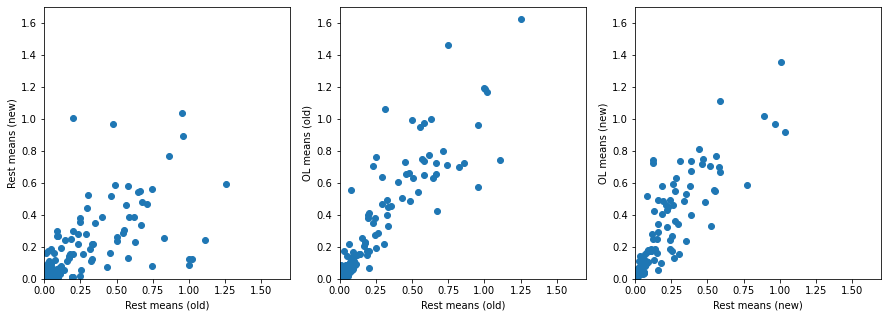

In [63]:
figSize(5, 15)

plt.subplot(1, 3, 1)
plt.scatter(rest_means_old, rest_means_new)
plt.xlim([0, 1.7])
plt.ylim([0, 1.7])
plt.xlabel('Rest means (old)')
plt.ylabel('Rest means (new)')

plt.subplot(1, 3, 2)
plt.scatter(rest_means_old, OL_means_old)
plt.xlim([0, 1.7])
plt.ylim([0, 1.7])
plt.xlabel('Rest means (old)')
plt.ylabel('OL means (old)')

plt.subplot(1, 3, 3)
plt.scatter(rest_means_new, OL_means_new)
plt.xlim([0, 1.7])
plt.ylim([0, 1.7])
plt.xlabel('Rest means (new)')
plt.ylabel('OL means (new)')
plt.show()

In [84]:
OL_new_est = (OL_means_old) + (rest_means_new - (rest_means_old))
#OL_new_est = rest_means_new

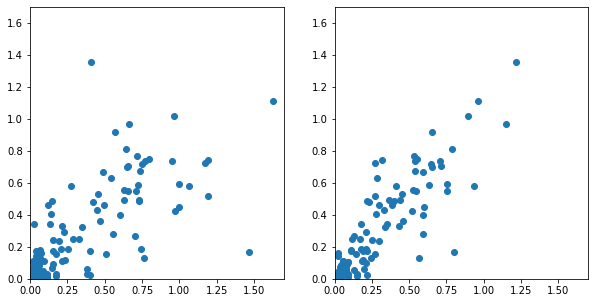

In [85]:
figSize(5, 10)

plt.subplot(1, 2, 1)
plt.scatter(OL_means_old, OL_means_new)
plt.xlim([0, 1.7])
plt.ylim([0, 1.7])


plt.subplot(1, 2, 2)
plt.scatter(OL_new_est, OL_means_new)
plt.xlim([0, 1.7])
plt.ylim([0, 1.7])
plt.show()

In [78]:
old_preds = np.vstack(OL_old['neural']).dot(decoder['coefs'].T) + decoder['bias']
old_true  = np.vstack(OL_old['target_pos'] - OL_old['cursor_pos'])

new_preds = np.vstack(OL_new['neural']).dot(decoder['coefs'].T) + decoder['bias']
new_true  = np.vstack(OL_new['target_pos'] - OL_new['cursor_pos'])

#mod_bias  = decoder['bias'] - decoder['coefs'].dot((rest_means_new - rest_means_old))
mod_bias  = -1 * decoder['coefs'].dot(rest_means_new)
mod_preds = np.vstack(OL_new['neural']).dot(decoder['coefs'].T) + mod_bias

In [79]:
from sklearn.metrics import r2_score

def modified_corr_score(true, pred):
    y = true.flatten()
    x = pred.flatten()
    
    alpha = y.dot(x) / x.dot(x)
    
    score = r2_score(true, alpha * pred)
    
    return score, alpha
    

In [80]:
score_old, alpha_old = modified_corr_score(old_true, old_preds)
score_new, alpha_new = modified_corr_score(new_true, new_preds)
score_mod, alpha_mod = modified_corr_score(new_true, mod_preds)

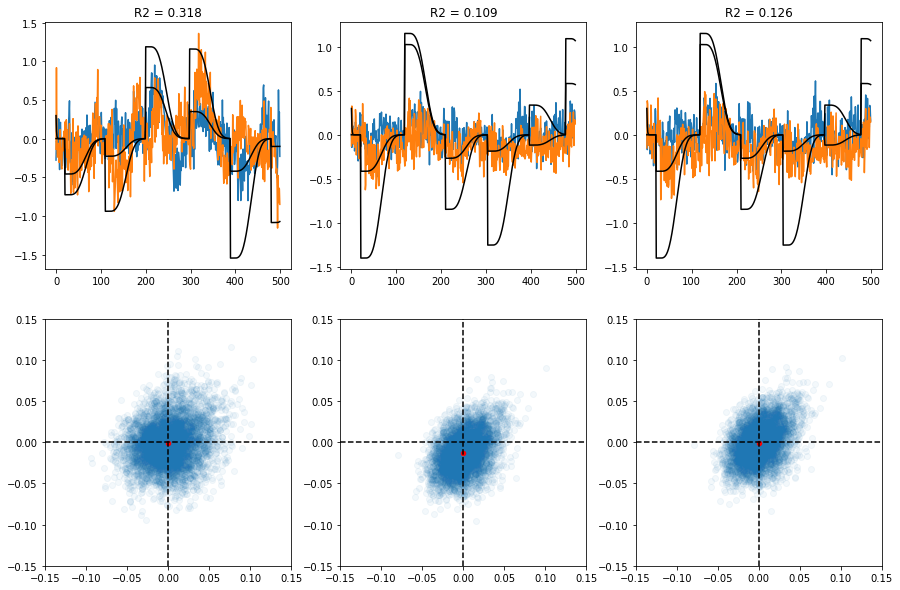

In [81]:
figSize(10, 15)


plt.subplot(2, 3, 1)
plt.plot(old_preds[:500, :] * alpha_old)
plt.plot(old_true[:500, :], c = 'k')
plt.title('R2 = {:.3}'.format(score_old))

plt.subplot(2, 3, 2)
plt.plot(new_preds[:500, :] * alpha_new)
plt.plot(new_true[:500, :], c = 'k')
plt.title('R2 = {:.3}'.format(score_new))

plt.subplot(2, 3, 3)
plt.plot(new_preds[:500, :] * alpha_mod)
plt.plot(new_true[:500, :], c = 'k')
plt.title('R2 = {:.3}'.format(score_mod))


plt.subplot(2, 3, 4)
offsets = old_preds
mean    = offsets.mean(axis = 0)
plt.scatter(offsets[:, 0], offsets[:, 1], alpha = 0.05)
plt.axvline(0, linestyle = '--', color = 'k')
plt.axhline(0, linestyle = '--', color = 'k')
plt.xlim([-0.15, 0.15])
plt.ylim([-0.15, 0.15])
plt.scatter(mean[0], mean[1], c = 'r', s = 20)

plt.subplot(2, 3, 5)
offsets = new_preds
mean    = offsets.mean(axis = 0)
plt.scatter(offsets[:, 0], offsets[:, 1], alpha = 0.05)
plt.axvline(0, linestyle = '--', color = 'k')
plt.axhline(0, linestyle = '--', color = 'k')
plt.xlim([-0.15, 0.15])
plt.ylim([-0.15, 0.15])
plt.scatter(mean[0], mean[1], c = 'r', s = 20)


plt.subplot(2, 3, 6)
offsets = mod_preds
mean    = offsets.mean(axis = 0)
plt.scatter(offsets[:, 0], offsets[:, 1], alpha = 0.05)
plt.axvline(0, linestyle = '--', color = 'k')
plt.axhline(0, linestyle = '--', color = 'k')
plt.xlim([-0.15, 0.15])
plt.ylim([-0.15, 0.15])
plt.scatter(mean[0], mean[1], c = 'r', s = 20)
